# In this notebook we shall explore the data and apply various machine learning algorithms to find the best fitting model.

- In the first part we shall perform the EDA
- In the second part we will do the modelling task

### 1. Exploring the Data:

In [1]:
# importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the data

data = pd.read_csv('../data/insurance.csv')

In [3]:
# checking the first few rows of the dataset:

data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
# checking the last few rows of the dataset

data.tail(10)

,age,sex,bmi,children,smoker,region,expenses
1328,23,female,24.2,2,no,northeast,22395.74
1329,52,male,38.6,2,no,southwest,10325.21
1330,57,female,25.7,2,no,southeast,12629.17
1331,23,female,33.4,0,no,southwest,10795.94
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


### Initial Observations:

- There are no unwanted rows at the top or bottom of the dataset.
- The columns in the data are mix of numeric and categorical columns.

### Checking some Data Statistics:

In [5]:
# checking the number of rows and columns in our dataset:

data.shape

# Our data has 1338 rows and 7 columns

(1338, 7)

In [6]:
# checking more info about our columns:

data.info()

# As mentioned above, the dataset is a mix of numeric and categorical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# descriptive statistics on numerical columns:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [8]:
# checking if there are any null values in the dataset:

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
# checking if the data has any duplicate values:

data.duplicated().sum()

# we can observe that there is a duplicate row

1

In [10]:
# removing the duplicated rows:
data = data.drop_duplicates()

# checking again if there are any duplicates:
data.duplicated().sum()

# now there are no duplicates.

0

### Observations from Data Statistics:

- There are no null values in the dataset
- For the expenses column, the expenses are very high from the 75th percentile to the max, we will need to investigate it further.
- We have removed the duplicated rows.

### Performing Univariate Analysis:

In [11]:
# Separating our data as numeric and categorical columns:

all_columns = list(data)
numeric_columns = ['age','bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns]


In [12]:
# getting the numeric and categorical columns

print(f"Numeric Columns: {numeric_columns}")

print(f"Categorical Columns: {categorical_columns}")

Numeric Columns: ['age', 'bmi', 'children', 'expenses']
Categorical Columns: ['sex', 'smoker', 'region']


### Age Column:

Text(0.5, 1.0, 'Frequency Distribution - Age')

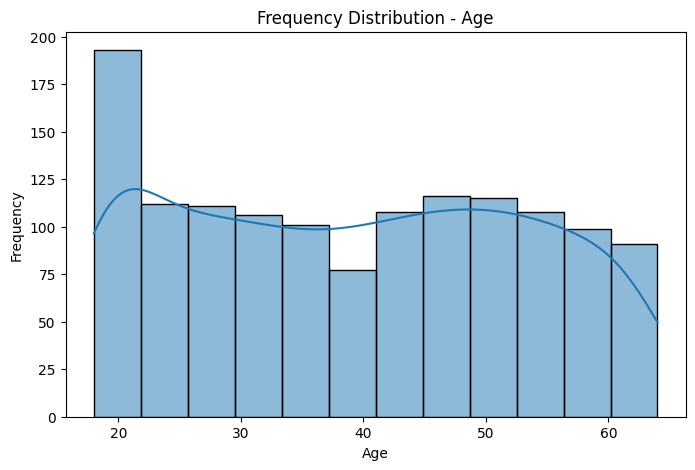

In [13]:
# Exploring the Age Column:

plt.figure(figsize=(8,5))
sns.histplot(data['age'], kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - Age')

# OBSERVATIONS:
# The age ranges between 20 and 65 

Text(0.5, 1.0, 'Boxplot - Age')

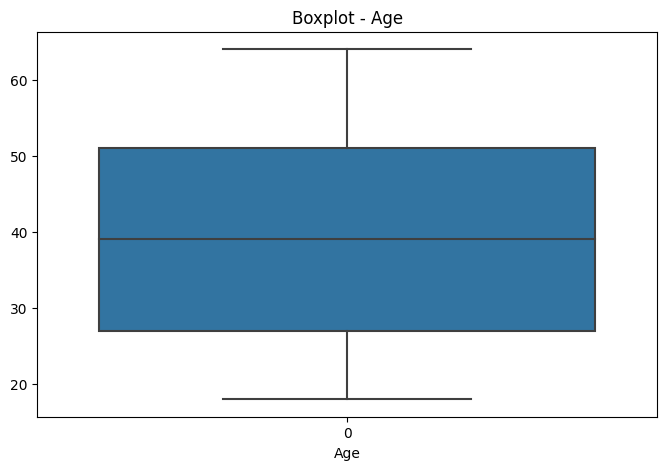

In [14]:
# Making a boxplot to check if there are any outliers:

plt.figure(figsize=(8,5))
sns.boxplot(data['age'])
plt.xlabel('Age')
plt.title('Boxplot - Age')

# OBSERVATIONS:
# The boxplot does not show any outliers.

### BMI Column:

Text(0.5, 1.0, 'Frequency Distribution - BMI')

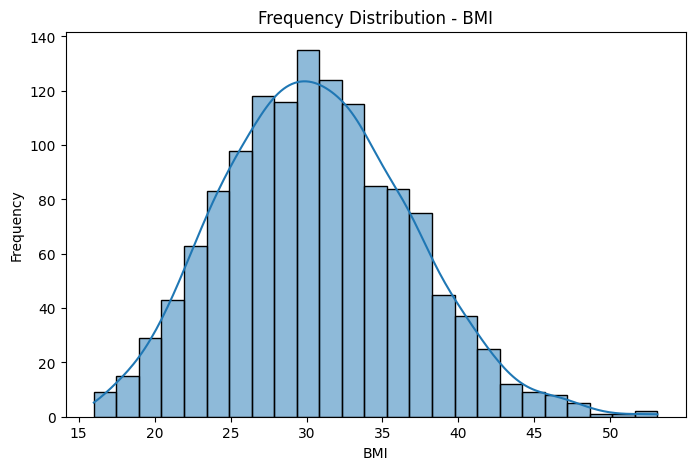

In [15]:
# Exploring the BMI Column:

plt.figure(figsize=(8,5))
sns.histplot(data['bmi'], kde = True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - BMI')

# OBSERVATIONS:

# We can see that the average BMI is 30.
# The BMI range is between 15 to 55 approx.
# For a person to be in healthy BMI range, the BMI needs to be in between 18.5 and 24.9.
# From the distribution we can see that many people have a BMI greater than 24.9 and some have BMI less than 18.5.

Text(0.5, 1.0, 'Boxplot - BMI')

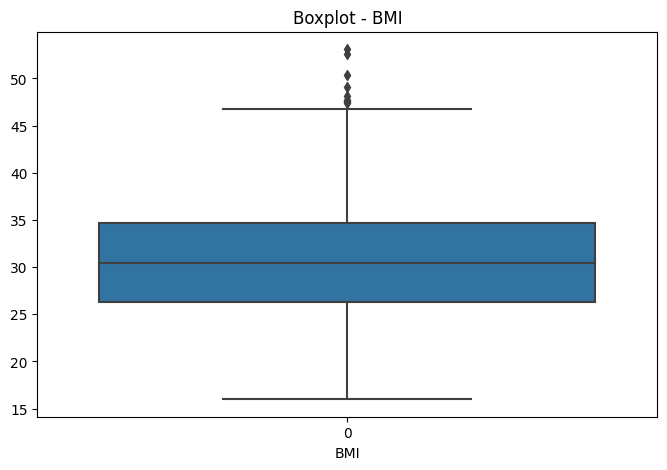

In [16]:
# Making a boxplot to check if there are any outliers:

plt.figure(figsize=(8,5))
sns.boxplot(data['bmi'])
plt.xlabel('BMI')
plt.title('Boxplot - BMI')

# OBSERVATIONS:
# There are some bmi values beyond 47, which maybe outliers, we must check the data to decipher if they are really outliers.

### Children Column:

Text(0.5, 1.0, 'Frequency Distribution - Children')

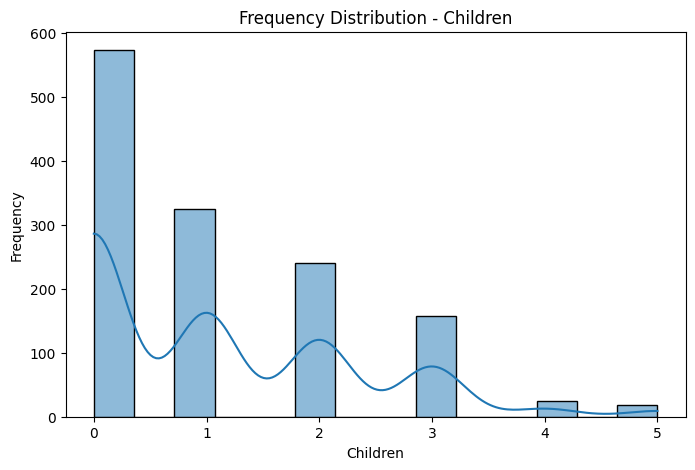

In [17]:
# Exploring the Children Column:

plt.figure(figsize=(8,5))
sns.histplot(data['children'], kde = True)
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - Children')

# OBSERVATIONS:
# We can observe that many people have no children at all.
# The number of people having children decreases as the number of children increases.b

Text(0.5, 1.0, 'Boxplot - Children')

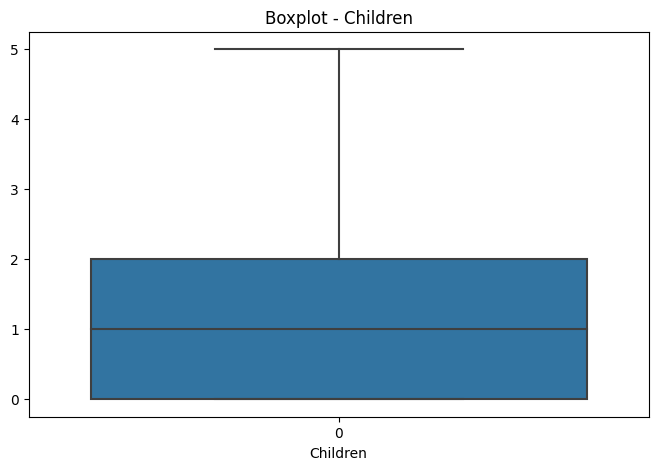

In [18]:
# Making a boxplot to check if there are any outliers:

plt.figure(figsize=(8,5))
sns.boxplot(data['children'])
plt.xlabel('Children')
plt.title('Boxplot - Children')

# OBSERVATIONS:
# The boxplot does not show any outliers.

### Expenses Column:

Text(0.5, 1.0, 'Frequency Distribution - Expenses')

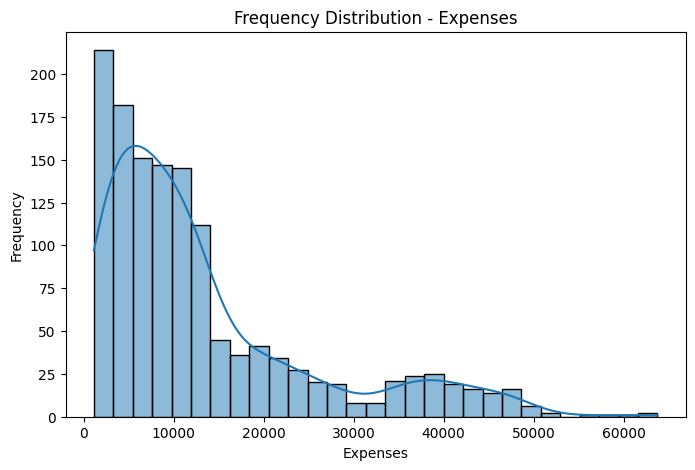

In [19]:
# Exploring the Expenses Column:

plt.figure(figsize=(8,5))
sns.histplot(data['expenses'], kde = True)
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - Expenses')

# OBSERVATIONS:
# We can see that the distribution is right skewed.
# The expenses range between 13000 to 63000 approx.
# The expenses are ranging from 13k to 16k from 0th to 75th percentile.
# From 75th percentile onwards, it ranges from 16k to 63k. We will need to explore this further

Text(0.5, 1.0, 'Boxplot - Expenses')

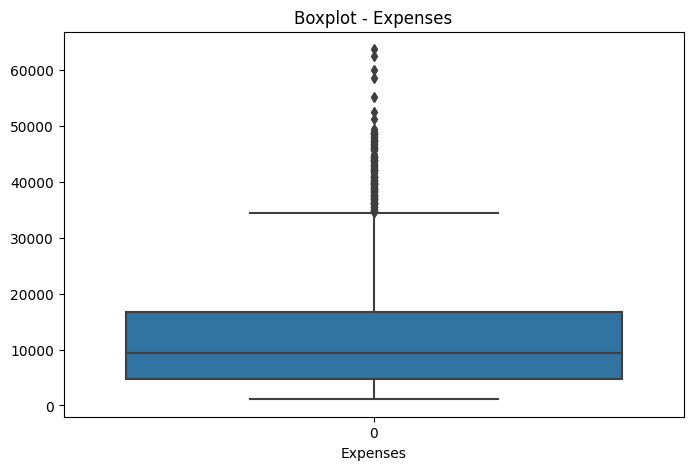

In [20]:
# Making a boxplot to check if there are any outliers:

plt.figure(figsize=(8,5))
sns.boxplot(data['expenses'])
plt.xlabel('Expenses')
plt.title('Boxplot - Expenses')

# OBSERVATIONS:
# There are some expenses values beyond 37000, which maybe outliers, we must check the data to decipher if they are really outliers.

### Sex Column:

In [21]:
# Getting the value counts for the categories of 'Sex' column:

data['sex'].value_counts()

# Observation:
# We can observe that the counts of males and females are almost equal.

male      675
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Count Plot - Sex')

<Figure size 800x500 with 0 Axes>

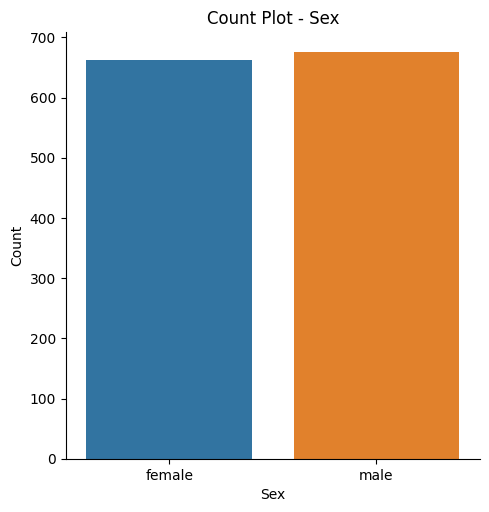

In [22]:
# Exploring the Sex Column:

plt.figure(figsize=(8,5))
sns.catplot(data = data, x = 'sex', kind = 'count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot - Sex')

# We can observe that both male and females are approx equal.

### Smoker Column:

In [23]:
# Getting the value counts for the categories of 'Sex' column:

data['smoker'].value_counts()

# Observation:
# We can observe that the counts of smokers is nearly quarter of non smokers.

no     1063
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Count Plot - Smoker')

<Figure size 800x500 with 0 Axes>

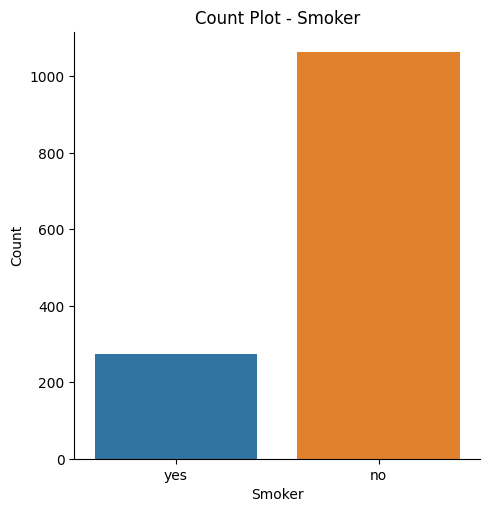

In [24]:
# Exploring the Smoker Column:

plt.figure(figsize=(8,5))
sns.catplot(data = data, x = 'smoker', kind = 'count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count Plot - Smoker')

# OBSERVATIONS:

# We can observe that the number of smoking people is very less as compared to non smoking people.

### Region Column:

In [25]:
# Getting the value counts for the categories of 'Sex' column:

data['region'].value_counts()

# Observation:
# We can observe that the counts of people in all regions are almost similar.

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Count Plot - Region')

<Figure size 800x500 with 0 Axes>

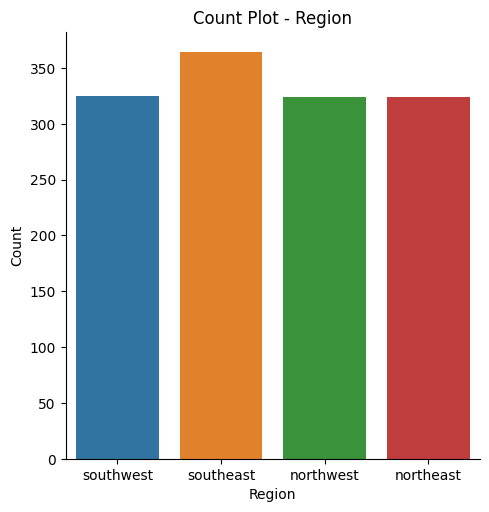

In [26]:
# Exploring the Region Column:

plt.figure(figsize=(8,5))
sns.catplot(data = data, x = 'region', kind = 'count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count Plot - Region')

# WE can observe that the people from all the regions are almost similar.

### Bi-Variate Analysis and Multi-Variate Analysis:

### HeatMap:

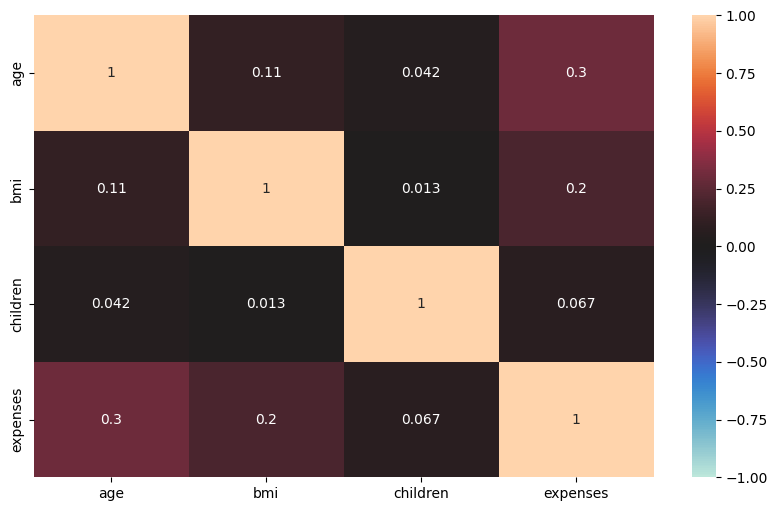

In [27]:
plt.figure(figsize = (10,6))

corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)

# OBSERVATIONS:
# We can observe that there is some positive correlation between expenses,age and expenses,bmi variables.

### Checking Relationship between Age and Expenses variable.

Text(0.5, 1.0, 'Relationship between Age and Expenses')

<Figure size 800x500 with 0 Axes>

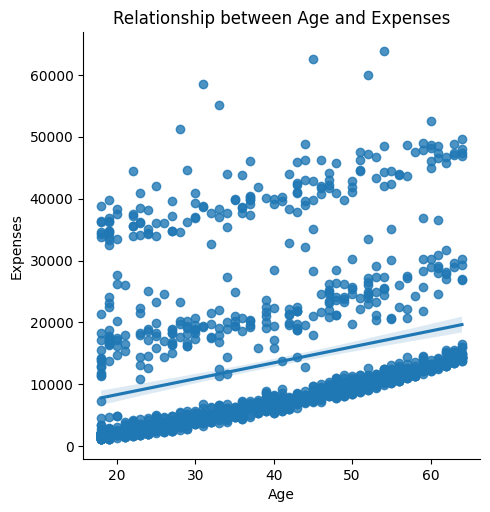

In [29]:
# We will plot an lmplot to check the relationship between the variables:

plt.figure(figsize=(8,5))
sns.lmplot(data=data, x="age", y="expenses")
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Relationship between Age and Expenses')

# OBSERVATIONS:
# We can observe that there is a positive relationship between the two variables based on the best fit line.
# As the age increases, the expenses increase as well.

### Checking relationship between BMI and expenses variable:

Text(0.5, 1.0, 'Relationship between BMI and Expenses')

<Figure size 800x500 with 0 Axes>

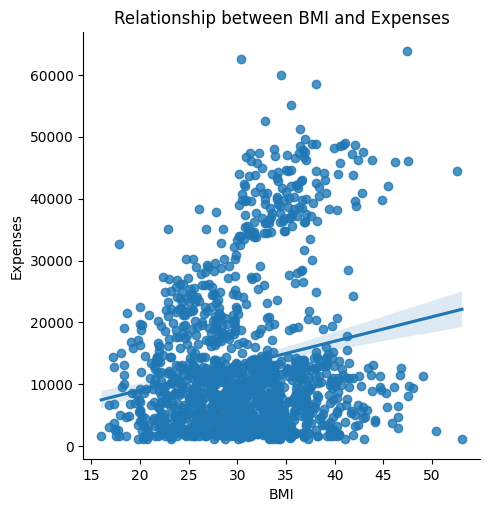

In [30]:
# We will plot an lmplot to check the relationship between the variables:

plt.figure(figsize=(8,5))
sns.lmplot(data=data, x="bmi", y="expenses")
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('Relationship between BMI and Expenses')

# OBSERVATIONS:
# We can observe that there is a positive relationship between the two variables based on the best fit line.
# As the 'bmi' increases the 'expenses' increase as well.

### Checking relationship between children and expenses variable:

Text(0.5, 1.0, 'Relationship between Children and Expenses')

<Figure size 800x500 with 0 Axes>

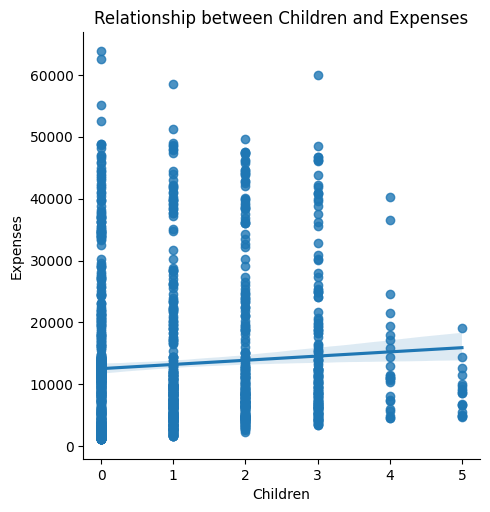

In [31]:
# We will plot an lmplot to check the relationship between the variables:

plt.figure(figsize=(8,5))
sns.lmplot(data=data, x="children", y="expenses")
plt.xlabel('Children')
plt.ylabel('Expenses')
plt.title('Relationship between Children and Expenses')

# OBSERVATIONS:
# We do not see much of a relationship between the two variables.

### Now that we have checked the relationship between the numeric variables, let us see whether the categories have an impact on the expenses variable.

### Checking relationship between Sex and Expenses variables:

Text(0.5, 1.0, 'Relationship between Sex and Expenses')

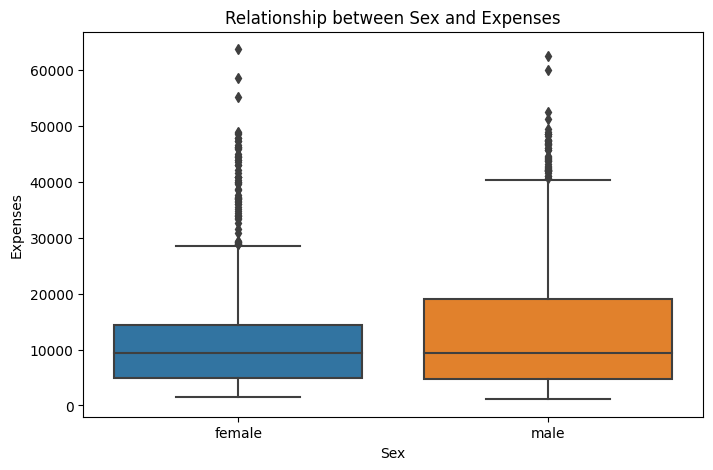

In [32]:


plt.figure(figsize=(8,5))
sns.boxplot(data=data, x="sex", y="expenses", orient="v")
plt.xlabel('Sex')
plt.ylabel('Expenses')
plt.title('Relationship between Sex and Expenses')

#OBSERVATION:

# The average expenses for males and females are the same.
# But the 75%tile and 100%tile expenses differ for males and females.

### Checking relationship between smoker and expenses variable:

Text(0.5, 1.0, 'Relationship between Smoker and Expenses')

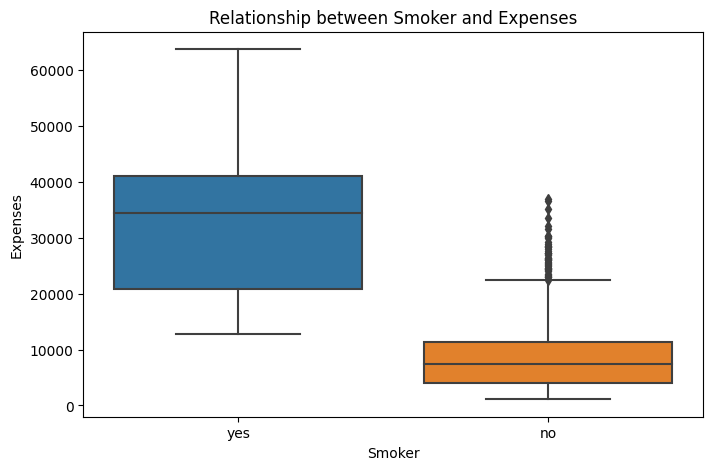

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x="smoker", y="expenses", orient="v")
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.title('Relationship between Smoker and Expenses')

#OBSERVATION:

#If you are a smoker, the average expenses vary a lot than if you are a non smoker.

### Checking relationship between region and expenses variable:

Text(0.5, 1.0, 'Relationship between Region and Expenses')

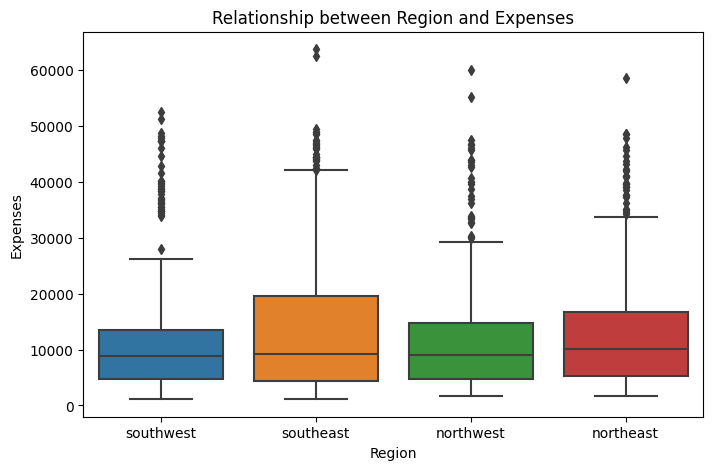

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x="region", y="expenses", orient="v")
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.title('Relationship between Region and Expenses')

#OBSERVATION:

# The average expenses for all regions are the same.
# But the 75%tile and 100%tile expenses differ between the regions.

### Checking if there is any change in data statistics if we have a normal bmi and if the normal bmi is below or above normal bmi.

In [35]:
# extracting data for normal bmi:

bmi_normal = data[(data.bmi >= 18.5) & (data.bmi <= 24.9)]
bmi_less = data[data.bmi <18.5]
bmi_more = data[data.bmi > 24.9]

### Checking if there is difference of expenses for people where bmi is less and bmi is normal

In [36]:
bmi_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
age,222.0,36.747748,13.652751,18.00,25.0,35.00,47.75,64.00
bmi,222.0,22.587387,1.627597,18.50,21.5,22.90,24.00,24.90
children,222.0,1.117117,1.242088,0.00,0.0,1.00,2.00,5.00
expenses,222.0,10379.499775,7500.713035,1121.87,4057.7,8604.15,15197.26,35069.37


In [37]:
bmi_less.describe().T

,count,mean,std,min,25%,50%,75%,max
age,20.0,32.3500,13.480102,18.00,21.00,27.50,38.2500,60.00
bmi,20.0,17.5750,0.602517,16.00,17.30,17.60,18.0250,18.30
children,20.0,1.0500,1.276302,0.00,0.00,1.00,2.0000,5.00
expenses,20.0,8852.2015,7735.038414,1621.34,2751.63,6759.26,12923.1675,32734.19


### Checking if there is difference of expenses for people where bmi is more and bmi is normal

In [38]:
bmi_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
age,222.0,36.747748,13.652751,18.00,25.0,35.00,47.75,64.00
bmi,222.0,22.587387,1.627597,18.50,21.5,22.90,24.00,24.90
children,222.0,1.117117,1.242088,0.00,0.0,1.00,2.00,5.00
expenses,222.0,10379.499775,7500.713035,1121.87,4057.7,8604.15,15197.26,35069.37


In [39]:
bmi_more.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1095.0,39.849315,14.055783,18.00,27.000,40.00,52.000,64.00
bmi,1095.0,32.542374,5.000886,25.00,28.600,31.90,35.800,53.10
children,1095.0,1.092237,1.197836,0.00,0.000,1.00,2.000,5.00
expenses,1095.0,13947.847169,12813.536936,1131.51,4904.905,9563.03,17654.445,63770.43


#### OBSERVATIONS:

#### If the BMI is less than normal, a person would be unhealthy and expenses would be more. But, here, the average expenses are very less for people having less bmi.

#### If the BMI is more than normal, the average expenses are more as well as the percentiles.

### During EDA we have seen that there is a large difference for 75%tile and max values of expenses. Let us try to explore if there are any pattern for that.

In [40]:
expenses_more75 = data[data.expenses > 16640]
expenses_less75 = data[data.expenses < 16640]

In [41]:
expenses_more75.describe().T

,count,mean,std,min,25%,50%,75%,max
age,335.0,40.188060,13.817583,18.00,28.000,42.00,52.000,64.00
bmi,335.0,31.311343,5.845039,17.80,27.100,30.90,35.500,52.60
children,335.0,1.179104,1.164924,0.00,0.000,1.00,2.000,5.00
expenses,335.0,31108.444776,10595.023813,16657.72,21302.115,28923.14,39726.565,63770.43


In [42]:
expenses_less75.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1002.0,38.899202,14.111403,18.00,26.0000,39.0,51.0000,64.0
bmi,1002.0,30.449601,6.171541,16.00,26.0000,30.1,34.3000,53.1
children,1002.0,1.067864,1.218155,0.00,0.0000,1.0,2.0000,5.0
expenses,1002.0,7318.220190,4041.619649,1121.87,3787.0775,7016.1,10704.0125,16586.5


### Is there any difference for expenses based on gender counts between percentiles more than and less than 75?

In [43]:
expenses_less75['sex'].value_counts()

female    515
male      487
Name: sex, dtype: int64

In [44]:
expenses_more75['sex'].value_counts()

male      188
female    147
Name: sex, dtype: int64

### Is there any difference for expenses based on smoker counts between percentiles more than and less than 75?

In [45]:
expenses_less75['smoker'].value_counts()

no     983
yes     19
Name: smoker, dtype: int64

In [46]:
expenses_more75['smoker'].value_counts()

yes    255
no      80
Name: smoker, dtype: int64

In [ ]:
# saving to csv

data.to_csv('fedata.csv')

## OBSERVATIONS BASED ON EDA:

### 1. There is a positive relationship between the age, expenses and  bmi, expenses variables.
### 2. As age and bmi increase, the expenses increase as well.
### 3. If you are a male then the possibility of expenses increases.
### 4. If you are a smoker then your expenses increase as well.
### 5. We have seen that beyond 75%tile expenses increase exponentially, but they are mostly for smokers, which justifies the high expense values. Hence, we shall not treat them as outliers.

### THINGS WE CAN DO FURTHER:

### 1. Hypothesis testing between the expenses andt the categorical variables.
### 2. ANOVA where variables have more than 2 categories, for rest of the categorical variables T-test.